In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.model_selection import ParameterGrid
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import Holt
from statsmodels.tsa.api import ExponentialSmoothing 
import statsmodels.api as sm

from datetime import datetime, timedelta
import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from statsmodels.tsa.arima_model import ARIMA

In [2]:
plt.rcParams["figure.figsize"] = (15,7)

In [3]:
train1 = pd.read_csv('train_(2).csv')
train1.head()

,Month,Avg_sunspot_count
0,01-01-1749,97
1,02-01-1749,104
2,03-01-1749,117
3,04-01-1749,93
4,05-01-1749,142


In [4]:
train1.tail()

,Month,Avg_sunspot_count
3139,08-01-2010,30
3140,09-01-2010,36
3141,10-01-2010,34
3142,11-01-2010,34
3143,12-01-2010,25


In [5]:
# Sample Submission
sample_submission = pd.read_csv('sample_submission_(2).csv')
sample_submission.head()

,Month,Avg_sunspot_count
0,01-01-2011,37
1,02-01-2011,33
2,03-01-2011,234
3,04-01-2011,34
4,05-01-2011,43


In [6]:
month = pd.date_range(start ='1749-01-01', 
         end ='2010-12-31', freq ='M')
print(month)

DatetimeIndex(['1749-01-31', '1749-02-28', '1749-03-31', '1749-04-30',
               '1749-05-31', '1749-06-30', '1749-07-31', '1749-08-31',
               '1749-09-30', '1749-10-31',
               ...
               '2010-03-31', '2010-04-30', '2010-05-31', '2010-06-30',
               '2010-07-31', '2010-08-31', '2010-09-30', '2010-10-31',
               '2010-11-30', '2010-12-31'],
              dtype='datetime64[ns]', length=3144, freq='M')


In [7]:
train_df = pd.read_csv('train_(2).csv')
#Month=pd.to_datetime(traindf['Month'], format = '%Y-%m-%d').dt.strftime('%m-%d-%Y')
train_df.set_index(month,inplace=True)
train_df.drop('Month' , axis = 1 , inplace = True)
print(train_df.shape)
train_df.head()

(3144, 1)


,Avg_sunspot_count
1749-01-31,97
1749-02-28,104
1749-03-31,117
1749-04-30,93
1749-05-31,142


In [8]:
train_df.tail()

,Avg_sunspot_count
2010-08-31,30
2010-09-30,36
2010-10-31,34
2010-11-30,34
2010-12-31,25


In [9]:
test1 = pd.read_csv('test_(2).csv')
test1.head(3)

,Month,Avg_sunspot_count
0,1/1/2011,57.410725
1,2/1/2011,70.874513
2,3/1/2011,73.647723


In [10]:
test1.tail()

,Month,Avg_sunspot_count
115,8/1/2020,16.119260
116,9/1/2020,17.570040
117,10/1/2020,19.739263
118,11/1/2020,12.008661
119,12/1/2020,17.002567


In [11]:
month_test = pd.date_range(start ='2011-01-01', 
         end ='2020-12-31', freq ='M')
print(month_test)

DatetimeIndex(['2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31',
               '2011-09-30', '2011-10-31',
               ...
               '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30',
               '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31',
               '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', length=120, freq='M')


In [12]:
test_df = pd.read_csv('test_(2).csv')
#Month=pd.to_datetime(testdf['Month'], format = '%Y-%m-%d').dt.strftime('%m-%d-%Y')
test_df.set_index(month_test,inplace=True)
test_df.drop('Month' , axis = 1 , inplace = True)
print(test_df.shape)
test_df.head()

(120, 1)


,Avg_sunspot_count
2011-01-31,57.410725
2011-02-28,70.874513
2011-03-31,73.647723
2011-04-30,69.391753
2011-05-31,75.638426


In [50]:
train_np = pd.DataFrame()
train_np['d'] = month
train_np['y'] = train1['Avg_sunspot_count']
train1.head()

,Month,Avg_sunspot_count
0,01-01-1749,97
1,02-01-1749,104
2,03-01-1749,117
3,04-01-1749,93
4,05-01-1749,142


In [51]:
test_np = pd.DataFrame()
test_np['d'] = month_test
test_np.head()

,d
0,2011-01-31
1,2011-02-28
2,2011-03-31
3,2011-04-30
4,2011-05-31


In [52]:
test_np.tail()

,d
115,2020-08-31
116,2020-09-30
117,2020-10-31
118,2020-11-30
119,2020-12-31


In [16]:
len(test_np)

120

# EDA

In [17]:
train_df.isnull().sum() 
# No missing values so no missing value imputation required

Avg_sunspot_count    0
dtype: int64

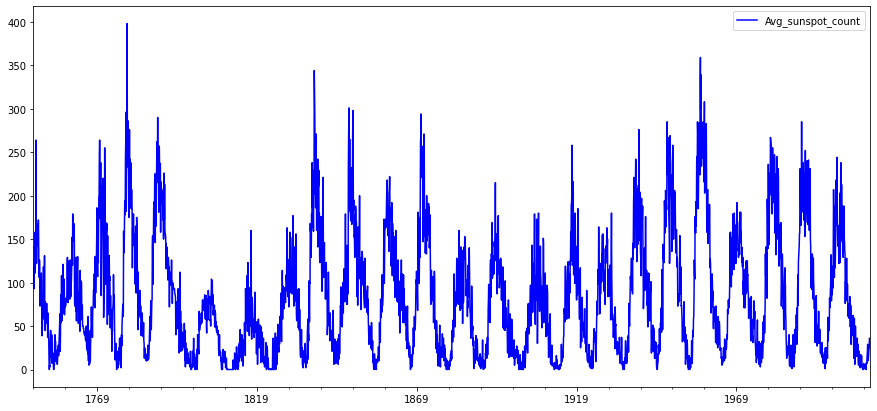

In [18]:
train_df.plot(color = 'blue')
plt.show()

In [19]:
# We can see that the data is not exactly cyclic. Seasonality is present.
# For better understanding of seasonality we will plot only two years and will try to visualize it.

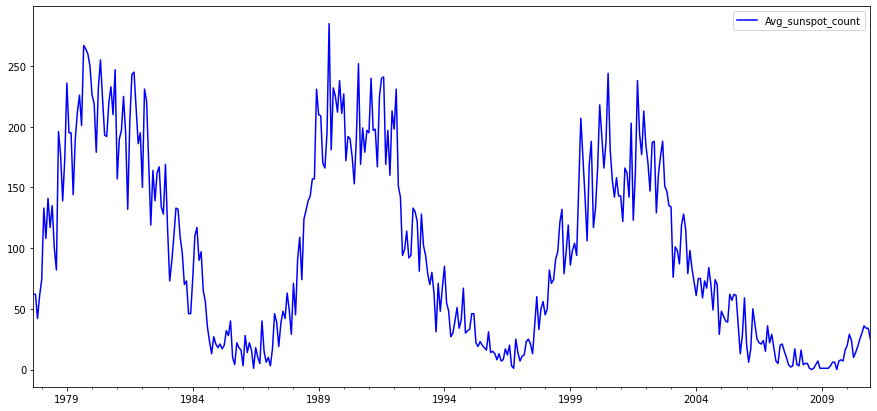

In [20]:
train_df[-400:].plot(color = 'blue')

In [21]:
# We can see that seasonality is present.
# We will know use decomposition to understand the time series data better.

In [22]:
# To check autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

(<Figure size 1080x504 with 1 Axes>,)

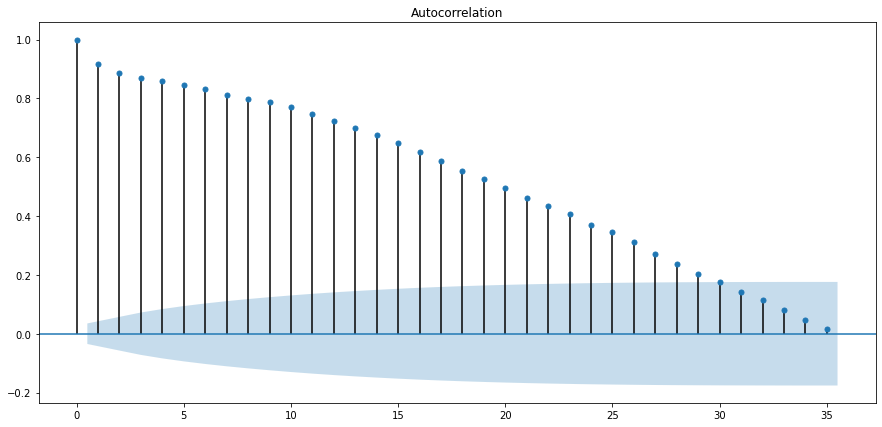

In [23]:
plot_acf(train_df ),

(<Figure size 1080x504 with 1 Axes>,)

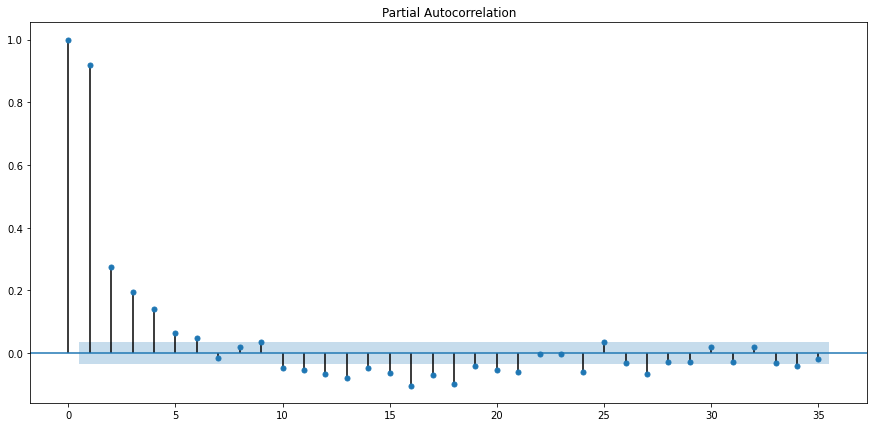

In [24]:
plot_pacf(train_df),

# Decomposition

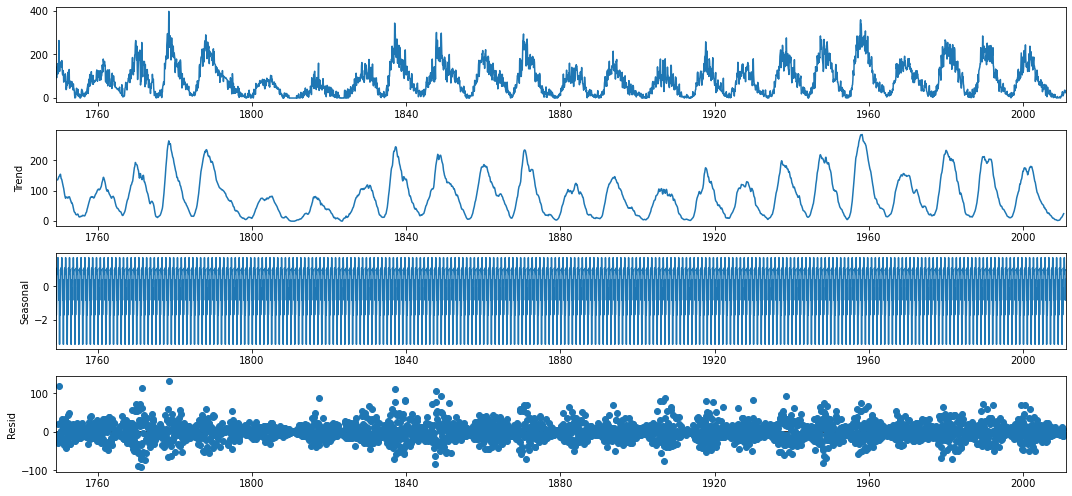

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(train_df ,  model = 'additive')
decomposition.plot()
plt.show()

In [26]:
train_df[train_df['Avg_sunspot_count'] == 0].count()

Avg_sunspot_count    81
dtype: int64

In [27]:
train_df[train_df['Avg_sunspot_count'] < 0].count()

Avg_sunspot_count    0
dtype: int64

In [28]:
traindf1 = train_df['Avg_sunspot_count'].replace(to_replace = 0, value = 0.00001)
traindf1.head()

1749-01-31     97.0
1749-02-28    104.0
1749-03-31    117.0
1749-04-30     93.0
1749-05-31    142.0
Freq: M, Name: Avg_sunspot_count, dtype: float64

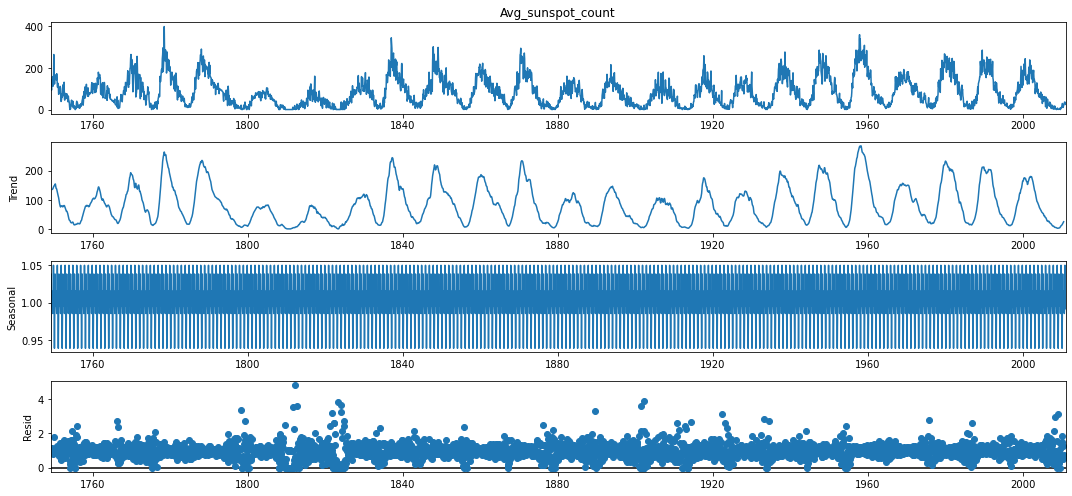

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompositionfinal = seasonal_decompose(traindf1 ,  model = 'multiplicative')
decompositionfinal.plot()
plt.show()

# Models

# Exponential Smoothing

C:\Users\Akriti Gobhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Akriti Gobhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


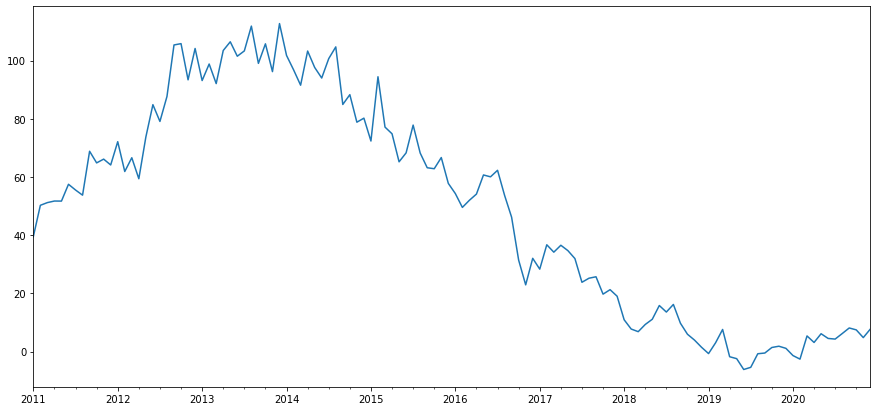

In [47]:
#from statsmodels.tsa.api import  ExponentialSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Final Model

model_TESfinal = ExponentialSmoothing(train_df,seasonal='additive',seasonal_periods=132)
model_TESfinal = model_TESfinal.fit(smoothing_level = 0.1,smoothing_seasonal=0.1,optimized=True )
forecastfinal= model_TESfinal.forecast(120)
forecastfinal.plot()

In [48]:
finaldf = pd.DataFrame()
finaldf['Month'] = sample_submission['Month']
finaldf['Avg_sunspot_count'] = forecastfinal.reset_index(drop =True)
finaldf.head()

,Month,Avg_sunspot_count
0,01-01-2011,39.480840
1,02-01-2011,50.250039
2,03-01-2011,51.178303
3,04-01-2011,51.715945
4,05-01-2011,51.696419


In [49]:
finaldf.to_csv('_Akriti_final_.csv' , index =False)


In [53]:
train_A = pd.read_csv('train_(2).csv')
train_A.head()

,Month,Avg_sunspot_count
0,01-01-1749,97
1,02-01-1749,104
2,03-01-1749,117
3,04-01-1749,93
4,05-01-1749,142


In [54]:
train_A.tail()

,Month,Avg_sunspot_count
3139,08-01-2010,30
3140,09-01-2010,36
3141,10-01-2010,34
3142,11-01-2010,34
3143,12-01-2010,25


In [55]:
train_date = pd.date_range(start='01/01/1749', end='01/01/2011', freq='M')
train_A['Month'] = pd.DataFrame(train_date)
train_A = train_A.set_index('Month')

In [56]:
train_A = train_A['1860-01-01':'2011-01-01']

In [63]:
train_3 = datetime(2001,1,1)
test_3 = datetime(2011, 1,1)

train = train_A[: train_3]
test = train_A[train_3 + timedelta(days=1) : test_3]

print(train.shape)
print(test.shape)

(1692, 1)
(120, 1)


# Arima Model

In [64]:
p = q = range(0,3)
d = range(1,2)
pdq = list(itertools.product(p,d,q))
print('Parameter Combinations : ')
for i in range(1, len(pdq)):
    print('Model : {}'.format(pdq[i]))

Parameter Combinations : 
Model : (0, 1, 1)
Model : (0, 1, 2)
Model : (1, 1, 0)
Model : (1, 1, 1)
Model : (1, 1, 2)
Model : (2, 1, 0)
Model : (2, 1, 1)
Model : (2, 1, 2)


In [66]:
df11 = pd.DataFrame(columns=['param', 'AIC'])
for param in pdq:
    model_A = ARIMA(train_A, order=param)
    model_A_fit = model_A.fit()
    print('ARIMA {} - AIC : {}'.format(param, model_A_fit.aic))
    df11 = df11.append({'param' : param, 'AIC' : model_A_fit.aic}, ignore_index=True)

C:\Users\Akriti Gobhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Akriti Gobhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Akriti Gobhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Akriti Gobhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Akriti Gobhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159

ARIMA (0, 1, 0) - AIC : 17097.663757971874
ARIMA (0, 1, 1) - AIC : 16836.596044556587


C:\Users\Akriti Gobhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Akriti Gobhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Akriti Gobhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 2) - AIC : 16804.281167671837
ARIMA (1, 1, 0) - AIC : 16943.34552366211


C:\Users\Akriti Gobhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Akriti Gobhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Akriti Gobhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Akriti Gobhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) - AIC : 16809.240012932492
ARIMA (1, 1, 2) - AIC : 16806.145686699314
ARIMA (2, 1, 0) - AIC : 16851.759048127416


C:\Users\Akriti Gobhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Akriti Gobhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Akriti Gobhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Akriti Gobhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 1) - AIC : 16803.89472013281


C:\Users\Akriti Gobhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Akriti Gobhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 2) - AIC : 16759.460703583496


In [67]:
df11.sort_values(by=['AIC'])

,param,AIC
8,"(2, 1, 2)",16759.460704
7,"(2, 1, 1)",16803.894720
2,"(0, 1, 2)",16804.281168
5,"(1, 1, 2)",16806.145687
4,"(1, 1, 1)",16809.240013
1,"(0, 1, 1)",16836.596045
6,"(2, 1, 0)",16851.759048
3,"(1, 1, 0)",16943.345524
0,"(0, 1, 0)",17097.663758


In [68]:
modelArima = ARIMA(train_A, order=(0,1,2))
modelArima_fit = modelArima.fit()
modelArima_fit.summary()

C:\Users\Akriti Gobhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Akriti Gobhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARIMA Model Results                              
===============================================================================
Dep. Variable:     D.Avg_sunspot_count   No. Observations:                 1811
Model:                  ARIMA(0, 1, 2)   Log Likelihood               -8398.141
Method:                        css-mle   S.D. of innovations             24.985
Date:                 Fri, 17 Sep 2021   AIC                          16804.281
Time:                         08:30:40   BIC                          16826.288
Sample:                     02-29-1860   HQIC                         16812.402
                          - 12-31-2010                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.0766      0.278     -0.276      0.783      -0.621       0.468
ma.L1.D.Avg_sunspot_count    -0.3960      0.023    -17.042      0.000      -0.441      -0.350
ma.L2.D.Avg_sunspot_count    -0.1314      0.022     -5.994      0.000      -0.174      -0.088
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.6365           +0.0000j            1.6365            0.0000
MA.2           -4.6490           +0.0000j            4.6490            0.5000
-----------------------------------------------------------------------------
"""

In [81]:
from sklearn.metrics import mean_squared_error
pred_start =  test.index[0]
pred_end = test.index[-1]
arima_predict = model_A_fit.predict(pred_start, pred_end)
rmse_arima =  np.sqrt(mean_squared_error(test.values, arima_predict.values))
rmse_arima

87.4341691727831

In [71]:
arima_predictions = model_A_fit.predict(pred_start, pred_end)
arima_pred = arima_predictions.cumsum()
arima_pred = pd.DataFrame(arima_pred, columns=train.columns)
arima_pred

,Avg_sunspot_count
2001-01-31,17.379767
2001-02-28,31.082529
2001-03-31,50.225381
2001-04-30,45.774727
2001-05-31,42.475516
...,...
2010-08-31,1.732644
2010-09-30,-1.239472
2010-10-31,-5.524829
2010-11-30,-7.382523


In [82]:
pred_fc = arima_pred.copy()
columns = train.columns
for col in columns:
    pred_fc[str(col) + '_forecast'] = train[col].iloc[-1] + pred_fc[str(col)]

pred_fc.head()

rmse_arima =  np.sqrt(mean_squared_error(test.values, arima_predict.values))
rmse_arima

87.4341691727831

In [73]:
test_3 = pd.read_csv('test_(2).csv')
test_3.head()

,Month,Avg_sunspot_count
0,1/1/2011,57.410725
1,2/1/2011,70.874513
2,3/1/2011,73.647723
3,4/1/2011,69.391753
4,5/1/2011,75.638426


In [75]:
test_3 = test_3.set_index('Month')

In [ ]:
model_A = ARIMA(train_3, order=(1,1,2))
model_A_fit = model_A.fit()
model_A_fit.summary()

In [77]:
pred_start1 = test_3.index[0]
pred_end1 = test_3.index[-1]

In [78]:
prediction = model_A_fit.predict(pred_start1, pred_end1)
prediction = model_A_fit.forecast(120)
prediction

(array([29.10040893, 31.42717913, 32.96909335, 34.1420559 , 35.12253184,
        35.9868071 , 36.76915708, 37.48615007, 38.14680756, 38.75685749,
        39.32052009, 39.84126251, 40.32212232, 40.7658504 , 41.17497785,
        41.55185063, 41.89865042, 42.21740912, 42.51002042, 42.77824977,
        43.02374322, 43.24803566, 43.45255832, 43.63864579, 43.80754258,
        43.96040916, 44.09832769, 44.22230725, 44.33328883, 44.43214985,
        44.51970855, 44.5967279 , 44.66391938, 44.72194644, 44.77142772,
        44.81294014, 44.84702163, 44.87417384, 44.89486453, 44.90952991,
        44.91857671, 44.92238423, 44.92130616, 44.91567231, 44.90579021,
        44.89194666, 44.87440907, 44.85342683, 44.82923246, 44.80204281,
        44.77206008, 44.73947281, 44.70445683, 44.66717611, 44.62778351,
        44.5864216 , 44.54322334, 44.49831268, 44.45180522, 44.40380875,
        44.3544238 , 44.30374409, 44.25185703, 44.19884413, 44.14478138,
        44.08973966, 44.03378505, 43.97697918, 43.9

In [79]:
A = prediction[0]
test_df['Avg_sunspot_count'] = A

In [80]:
#test_df.to_csv('Akriti1.csv')